In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Metodo de Euler para aproximar EDOs
---
Seja a EDO a seguir: 
$$ 
\begin{align}
    \left\{
        \begin{array}{rcl}
            y'(t) &= & f(t, y(t)) \\
            y(t_0) &= & y_0 
        \end{array}
    \right.
\end{align}
$$
Escolhendo um $h$ para ser o tamanho de cada passo, podemos discretizar nosso intervalo da seguinte maneira:
$$
t_n = t_0 + n \cdot h
$$
E então:
$$
y_{n+1} = y_n + hf(t_n, y_n)
$$
O valor $y_n$ é uma aproximação da solução da EDO no ponto $t_n: y_n \approx y(t_n)$

In [6]:
def euler(fA, fB, t0, A0, B0, T, steps):
    N = int((T - t0)/steps)
    ts = np.linspace(t0, T, N+1)
    As = np.zeros(N+1)
    Bs = np.zeros(N+1)
    As[0], Bs[0] = A0, B0

    for i in range(N):
        As[i+1] = As[i] + steps*fA(ts[i], As[i], Bs[i])
        Bs[i+1] = Bs[i] + steps*fB(ts[i], As[i], Bs[i])

    return ts, As, Bs

#### Agora vamos modelar a EDO com o modelo presa-predador (Equações de Lotka-Volterra):
---

$$
\begin{align}
\frac{dA}{dt} &= kA - \gamma A^2 - \rho AB \\
\frac{dB}{dt} &= - \alpha B + \sigma AB
\end{align}
$$

- $`\gamma A^2`$ é a parcela logística e evita que $`\lim_{x\to\infty}A(t) = \infty`$ na ausência do predador
- $`\rho AB`$ representa a quantidade de presas mortas por predadores
- $`\sigma AB`$ representa a quantidade de predadores beneficiados com a predação

---

Temos aqui duas funções envolvidas que se correlacionam: $`A(t), B(t)`$

$$
\begin{cases}
    A'(t) & = kA(t) - \gamma A(t)^2 - \rho A(t) B(t) \\
    A(t_0) & = A_0
\end{cases}
$$

nesse caso, $`f_A(t, A(t)) = kA(t) - \gamma A(t)^2 - \rho A(t) B(t)`$

$$
\begin{cases}
    B'(t) &= - \alpha B(t) + \sigma A(t) B(t) \\
    B(t_0) &= B_0
\end{cases}
$$

e $`f_B(t, B(t)) = - \alpha B(t) + \sigma A(t) B(t)`$

Na primeira iteracao:

$$
\begin{align}
A_1 &= A_0 + h(kA_0 - \gamma A_0^2 - \rho A_0 B_0)\\
B_1 &= B_0 + h(- \alpha B_0 + \sigma A_0 B_0)
\end{align}
$$

e assim seguimos.

---

Vamos modelar o sistema com as constantes:
- $`k = 1.0`$
- $`\gamma = 0`$
- $`\rho = 0.5`$
- $`\alpha = 0.75`$
- $`\sigma = 0.5`$

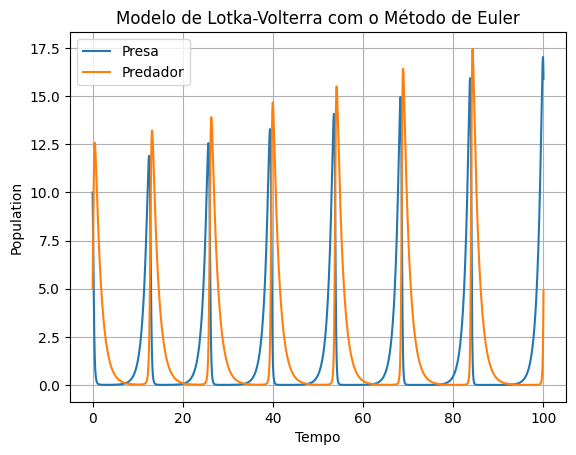

In [ ]:
k, gamma, rho, alpha, sigma = 1.0, 0, 0.5, 0.75, 0.5
time = 100
step = 0.01

A0 = 10
B0 = 5

dAdt = lambda t, A, B: k*A - gamma*(A**2) - rho*A*B
dBdt = lambda t, A, B: -alpha*B + sigma*A*B

ts, As, Bs = euler(dAdt, dBdt, 0, A0, B0, time, step)

plt.plot(ts, As, label='Presa')
plt.plot(ts, Bs, label='Predador')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo de Lotka-Volterra com o Método de Euler')
plt.grid()
plt.legend()
plt.show()


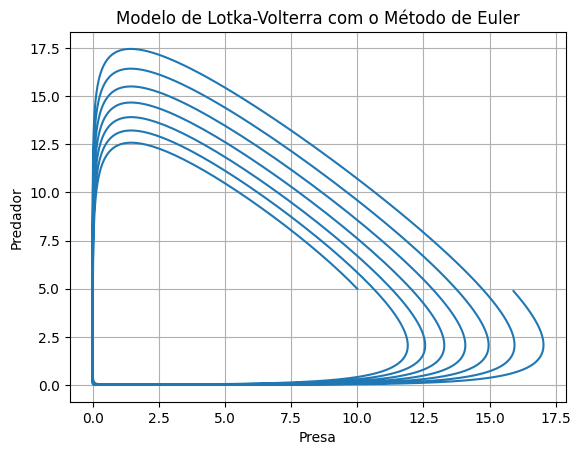

In [11]:
plt.plot(As, Bs)
plt.xlabel('Presa')
plt.ylabel('Predador')
plt.title('Modelo de Lotka-Volterra com o Método de Euler')
plt.grid()
plt.show()

# Exemplo da Internet
Veja nesse [link](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations#:~:text=Suppose%20there%20are,interval%20is%20arbitrary)

Presa: Coelho
Predador: Raposa

Modelagem do sistema:
- $10$ coelhos, ou seja, $`A_0 = 10`$
- $10$ raposas, ou seja, $`B_0 = 10`$
- Taxa de crescimento dos coelhos: $1.1$, ou seja, $`k = 1.1`$
- Taxa de predacao das raposas sobre os coelhos: $0.4$, ou seja, $`\rho = 0.4`$
- Taxa de mortalidade das raposas: $0.4$, ou seja, $`\alpha = 0.4`$
- Taxa de raposas beneficiadas com a predação: $0.1$, ou seja, $`\sigma = 0.1`$

Temos o seguinte sistema:

$$
\begin{gather*}
\begin{cases}
    A'(t) & = 1.1A(t)  - 0.4 A(t) B(t) \\
    A(t_0) & = 10
\end{cases}
\\[2ex]
\begin{cases}
    B'(t) &= - 0.4 B(t) + 0.1 A(t) B(t) \\
    B(t_0) &= 10
\end{cases}
\end{gather*}
$$

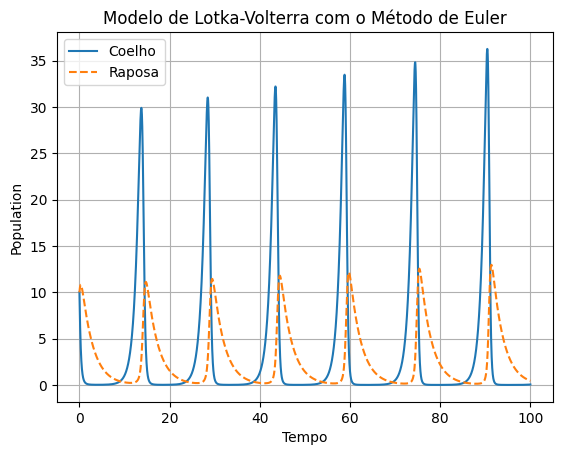

In [ ]:
k, gamma, rho, alpha, sigma = 1.1, 0, 0.4, 0.4, 0.1
time = 100
step = 0.01

A0 = 10
B0 = 10

dAdt = lambda t, A, B: k*A - gamma*(A**2) - rho*A*B
dBdt = lambda t, A, B: -alpha*B + sigma*A*B

ts, As, Bs = euler(dAdt, dBdt, 0, A0, B0, time, step)

plt.plot(ts, As, label='Coelho')
plt.plot(ts, Bs, '--', label='Raposa')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo de Lotka-Volterra com o Método de Euler')
plt.grid()
plt.legend()
plt.show()


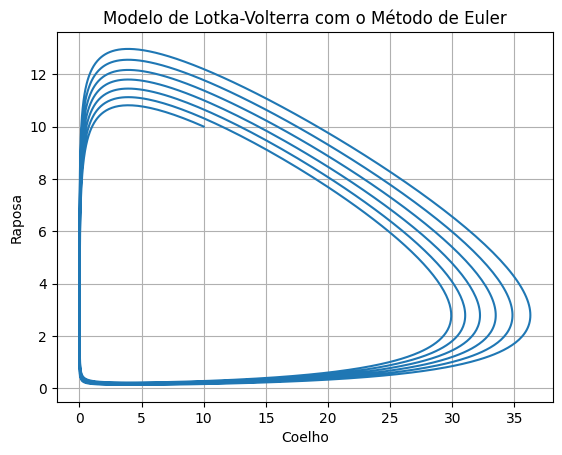

In [22]:
plt.plot(As, Bs)
plt.xlabel('Coelho')
plt.ylabel('Raposa')
plt.title('Modelo de Lotka-Volterra com o Método de Euler')
plt.grid()
plt.show()